In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Implementacao do Strip Tree
## Caso - Função quadrática
### Resolução de 1 unidad.

In [2]:
x = np.arange(-20,21,1)
y = x * x 

(-10, 410)

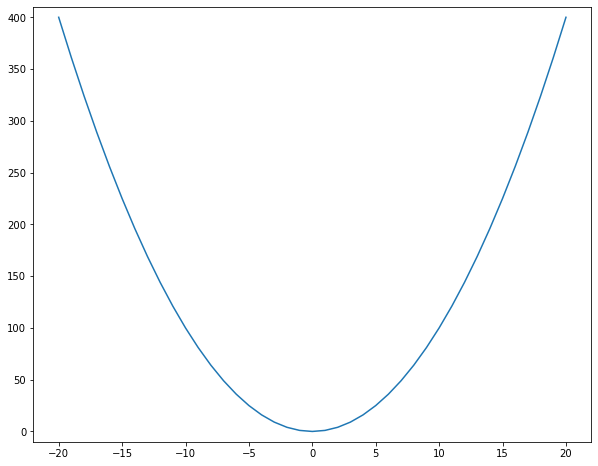

In [3]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.xlim(-22,22)
plt.ylim(-10,410)

In [4]:
def Strip_Tree(x,y,res=1):
       
    Numero_rectangulo = int((len(x)-2)/res) #39

    a = Numero_rectangulo + 2
    
    salida = np.zeros([a-2,12])
    
    for i in range(1,a-1):
        
        x_new = x[(i-1)*res:len(x)]
        y_new = y[(i-1)*res:len(x)]
   
        x1,y1 = x_new[0:res+1],y_new[0:res+1]
        x2,y2 = x_new[res:len(x)],y_new[res:len(y)]

        #Primera parte
        x1_start = x1[0]; x1_end = x1[-1]
        y1_start = y1[0]; y1_end = y1[-1]

        m1 = (y1_end - y1_start)/(x1_end - x1_start)

        if m1 >= 0:

            x1s = x1_start
            y1s = y1_start

            x1e = x1_end
            y1e = y1_end

            lon1 = math.sqrt( ((x1e-x1s)**2)+((y1e-y1s)**2) )   

        else:

            x1s = x1_start
            y1s = y1_start

            x1e = x1_end
            y1e = y1_end

            lon1 = math.sqrt( ((x1e-x1s)**2)+((y1e-y1s)**2) ) 

        #Segunda parte
        
        x2_start = x2[0]; x2_end = x2[-1]
        y2_start = y2[0]; y2_end = y2[-1]

        m2 = (y2_end - y2_start)/(x2_end - x2_start)

        if m2 >= 0:

            x2s = x2_start
            y2s = y2_start

            x2e = x2_end
            y2e = y2_end

            lon2 = math.sqrt( ((x2e-x2s)**2)+((y2e-y2s)**2) )   

        else:

            x2s = x2_start
            y2s = y2_end

            x2e = x2_end
            y2e = y2_start

            lon2 = math.sqrt( ((x2e-x2s)**2)+((y2e-y2s)**2) )  

        wr = np.round((y2s - np.min(y2)),2)
        wl = np.round((np.max(y2) - y2s),2)

#         print('')
#         print('wr: ',wr)
#         print('wl: ',wl)
        
        salida[i-1,0] = x1s
        salida[i-1,1] = y1s 
        salida[i-1,2] = x1e
        salida[i-1,3] = y1e
        salida[i-1,4] = x2s
        salida[i-1,5] = y2s
        salida[i-1,6] = x2e
        salida[i-1,7] = y2e
        salida[i-1,8] = wl
        salida[i-1,9] = wr
        salida[i-1,10] = np.round(lon1,2)
        salida[i-1,11] = np.round(lon2,2)
        
    return salida

In [5]:
def rectangulo(x_start,y_start,x_end,y_end,wl,wr):
    
    #Son los cuatro lados del rectangulo, que al final son cuatro lineas
    
    xleft = [x_start,x_start]; yleft = [y_start - wr,y_start + wl]

    xright = [x_end,x_end]; yright = [y_start - wr,y_end]

    xtop = [x_start,x_end]; ytop = [y_end,y_end]

    xbot = [x_start,x_end]; ybot = [y_start -wr ,y_start - wr]
    
    return xleft,yleft,xright,yright,xtop,ytop,xbot,ybot

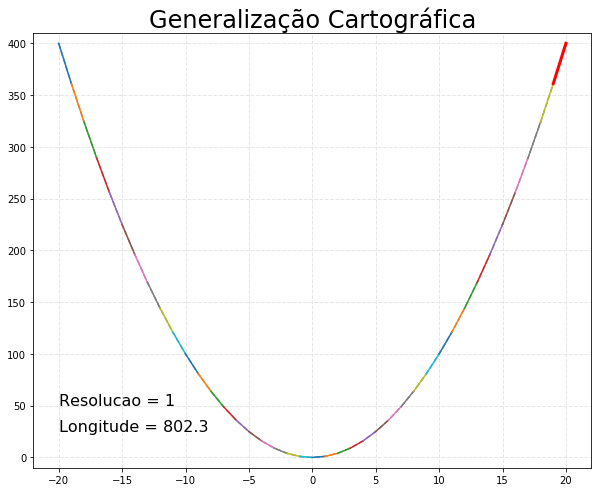

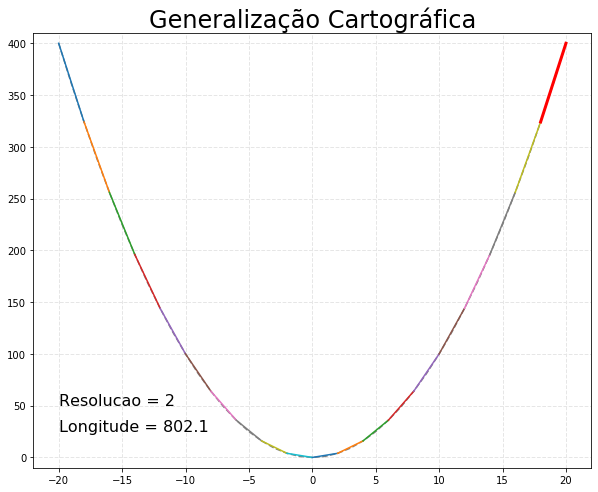

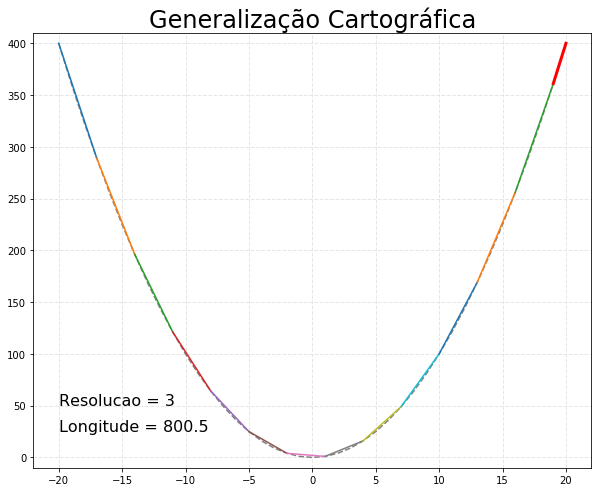

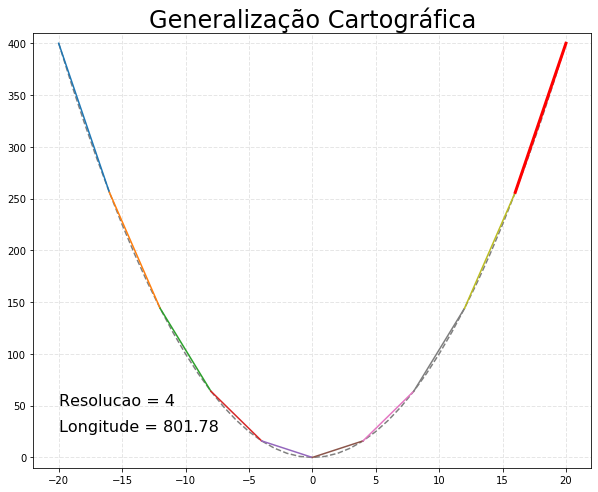

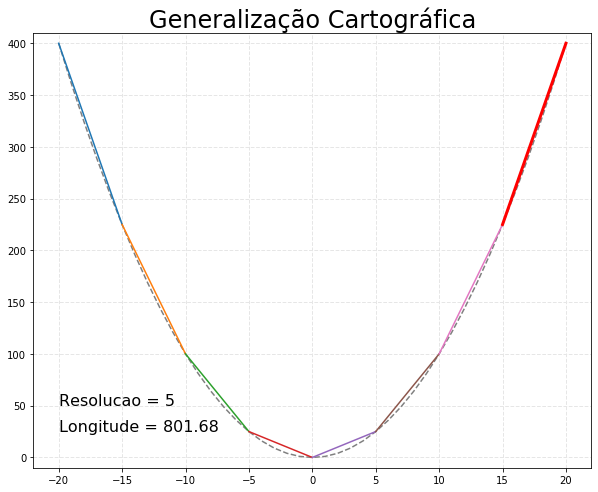

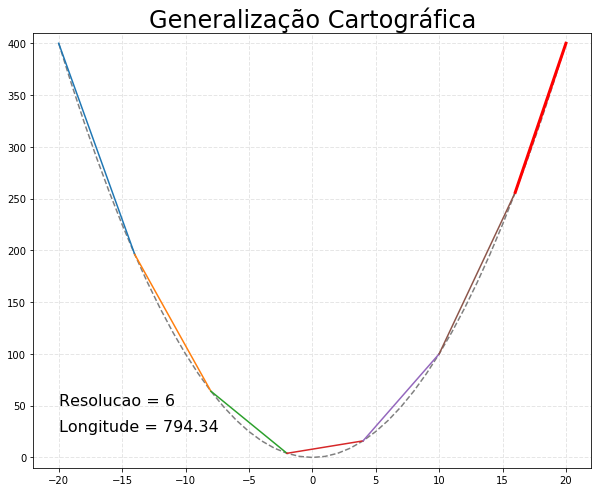

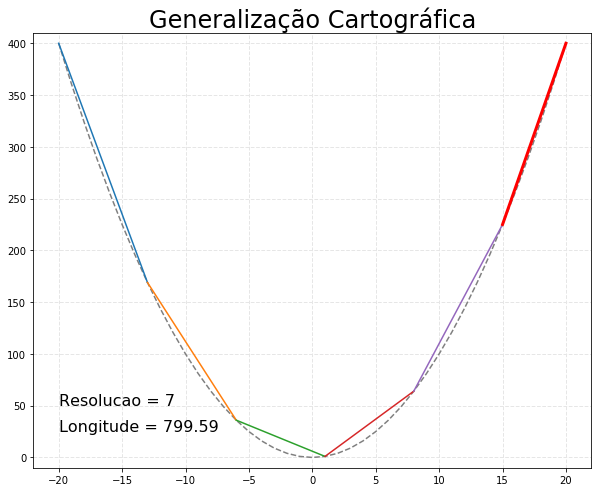

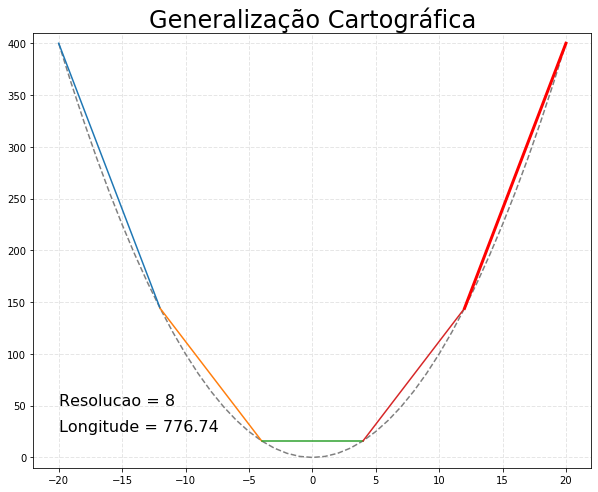

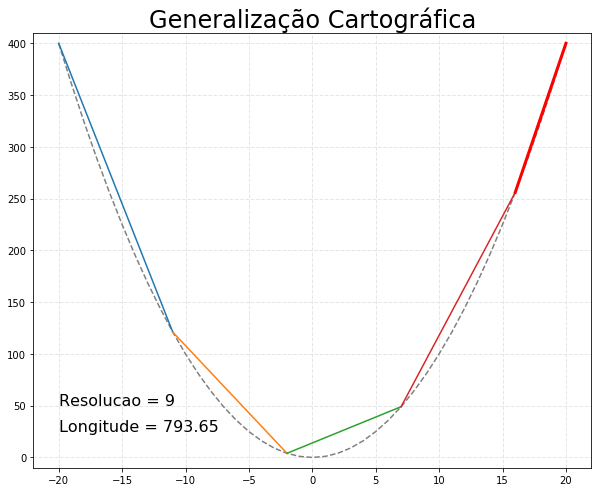

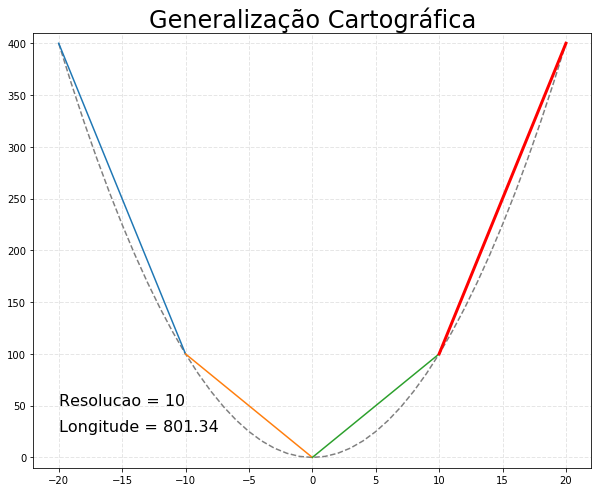

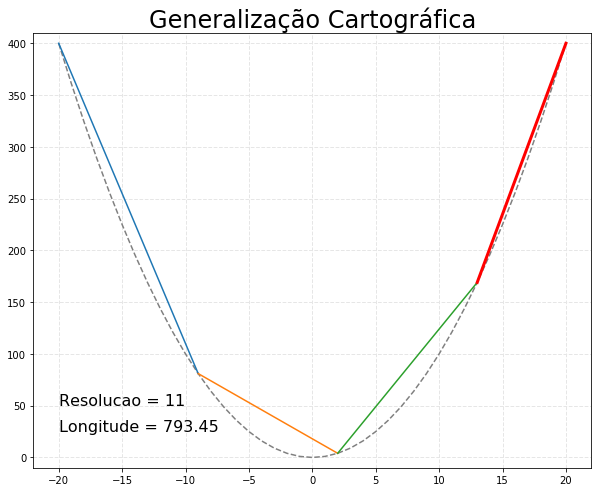

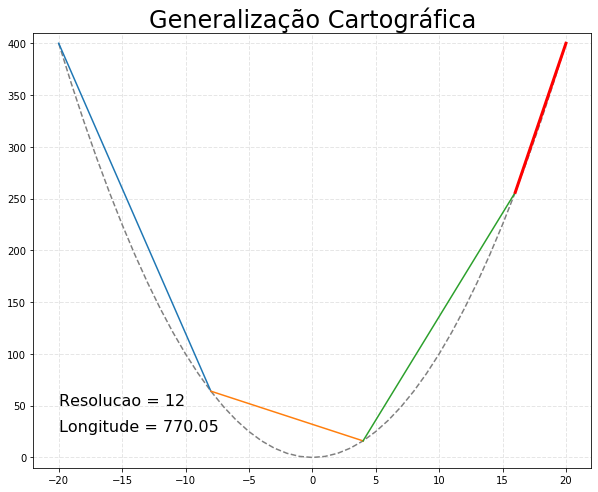

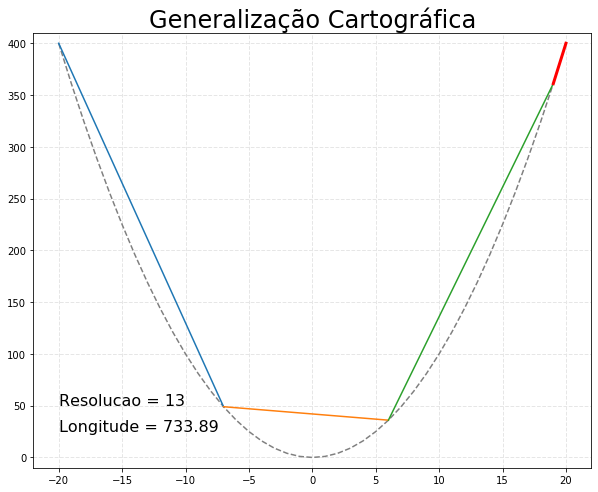

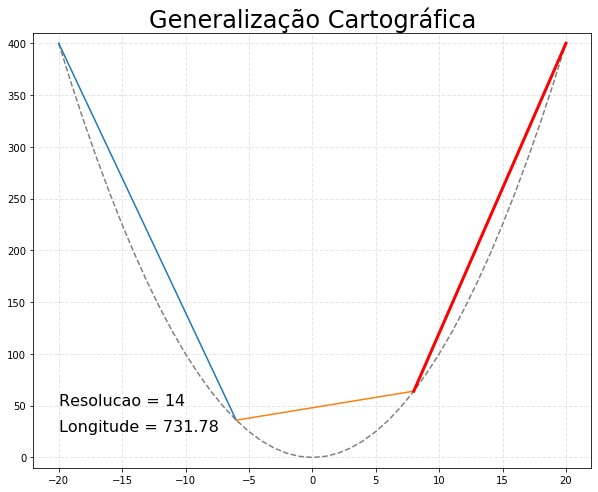

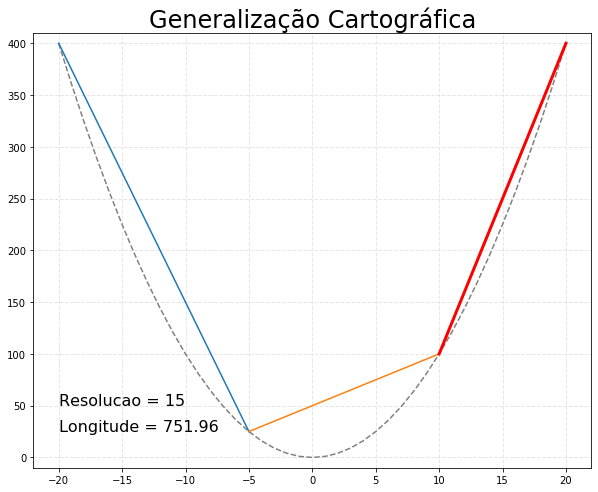

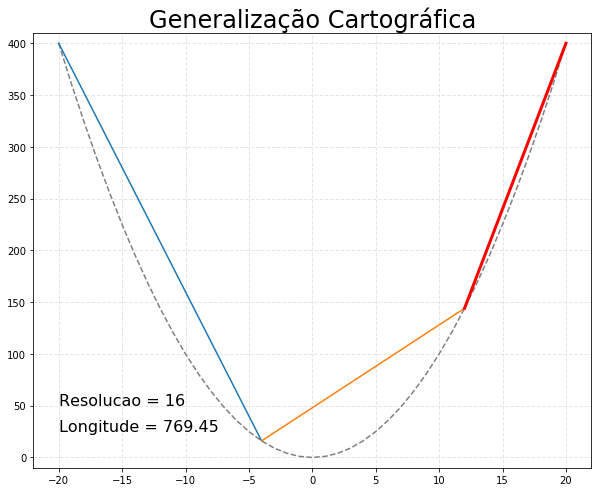

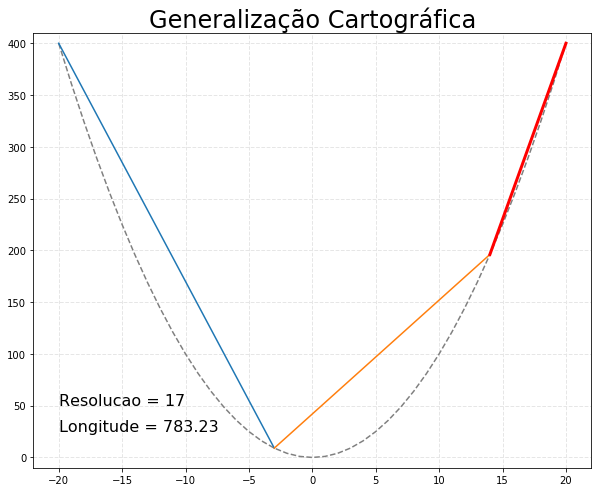

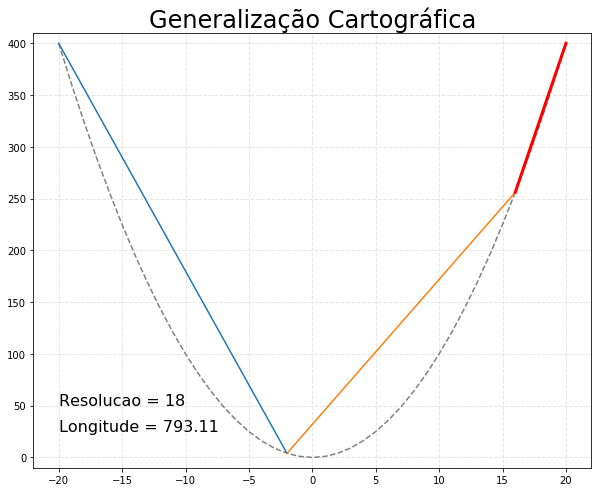

In [6]:

resultados = np.zeros([18,2])
a = 0
for nn in range(18):
    
    salida = Strip_Tree(x,y,nn+1)

    fig,ax = plt.subplots(1,figsize=(10,8))
    
    plt.plot(x,y,'--',color='0.5')

    for i in range(len(salida)):

        plt.plot([salida[i,0],salida[i,2]],[salida[i,1],salida[i,3]])

        xleft,yleft,xright,yright,xtop,ytop,xbot,ybot = rectangulo(salida[i,4],salida[i,5],salida[i,6],salida[i,7],
                                                               salida[i,8],salida[i,9])
#         plt.plot(xleft,yleft,'--g')
#         plt.plot(xright,yright,'--g')
#         plt.plot(xtop,ytop,'--g')
#         plt.plot(xbot,ybot,'--g')

    plt.plot([salida[len(salida)-1,4],salida[len(salida)-1,6]],
             [salida[len(salida)-1,5],salida[len(salida)-1,7]],'r',linewidth=3)
    
    plt.xlim(-22,22)
    plt.ylim(-10,410)
    
    longitud = np.sum(salida[:,10]) + salida[-1,11]
    
    res_title = 'Resolucao = ' + str(nn+1)
    lon_title = 'Longitude = ' + str(np.round(longitud,2))

    plt.text(-20,50,res_title, fontsize=16)
    plt.text(-20,25,lon_title, fontsize=16)
    
    plt.title('Generalização Cartográfica',fontsize=24)
    
    plt.grid(color='0.9', linestyle='--', linewidth=1)

    resultados[a,0] = nn+1
    resultados[a,1] = np.round(longitud,3)
    
    title = '../fig/Strip_Tree/GC'+str(nn).zfill(2)
    
#     plt.savefig(title,transparent = False,bbox_inches ='tight',pad_inches = 0.4)
    
    a = a + 1

(-10, 410)

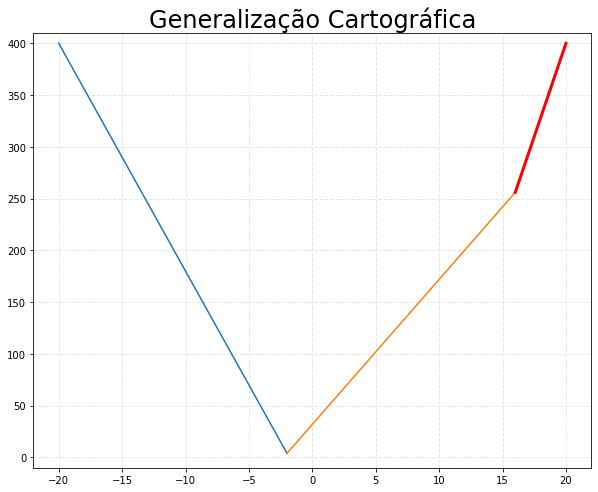

In [7]:
fig,ax = plt.subplots(1,figsize=(10,8))

for i in range(len(salida)):
    
    plt.plot([salida[i,0],salida[i,2]],[salida[i,1],salida[i,3]])
    
plt.plot([salida[len(salida)-1,4],salida[len(salida)-1,6]],
         [salida[len(salida)-1,5],salida[len(salida)-1,7]],'r',linewidth=3)

plt.title('Generalização Cartográfica',fontsize=24)

plt.grid(color='0.9', linestyle='--', linewidth=1)

plt.xlim(-22,22)
plt.ylim(-10,410)

## Informacao da Resolucao 10

In [8]:
salida = Strip_Tree(x,y,10)

for i in range(len(salida)):
    
    xleft,yleft,xright,yright,xtop,ytop,xbot,ybot = rectangulo(salida[i,4],salida[i,5],salida[i,6],salida[i,7],
                                                               salida[i,8],salida[i,9])
    
    print('')
    print(salida[i,0],salida[i,1],salida[i,2],salida[i,3],'0','0')
    print(xleft[0],yleft[0],xtop[1],ytop[1],salida[i,8],salida[i,9])


-20.0 400.0 -10.0 100.0 0 0
-10.0 0.0 20.0 400.0 300.0 100.0

-10.0 100.0 0.0 0.0 0 0
0.0 0.0 20.0 400.0 400.0 0.0

0.0 0.0 10.0 100.0 0 0
10.0 100.0 20.0 400.0 300.0 0.0
